<a href="https://colab.research.google.com/github/oliveirakay/uri-java/blob/master/PROJETO_BCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*NOME =* **"KAYQUE DE MORAES URBANO OLIVEIRA"**

*RA =* **"11202130076"**


##Proposta: Para tentar demonstrar absorção e compreensão dos tópicos apresentados ao longo do quadrimestre, optamos por fazer dois típos de abordagem: a **abordagem estática**, para demonstrar a capacidade de interpretação dos dados e ter *insights*; e a **abordagem dinâmica**, para demonstrar domínio na manipulação dos dados (com pandas, numpy, mathplotlib) e elaboração de código com loops e condicionais.

# MODELANDO OS DADOS (dependência)

## LEITURA DO ARQUIVO CSV 📚 + IMPORTS ✈

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1TPHQyck1Rdi8lwzLOkBaI0DvkqmJJdG-&export=download")

## CRIAÇÃO DE DATAFRAMES AUXILIARES

### CRIA A COLUNA PIB 💸
  A partir do produto das colunas "População" e "PIB per capita" gerei a coluna "PIB"

In [ ]:
# CRIA UMA COLUNA COM O PIB ANUAL DE CADA PAÍS
# CALCULADO ATRAVÉS DE: "PIB per capita" * "PIB"
df['PIB'] = df['PIB per capita']*df['População']
df.head()

,País,Ano,População,Continente,Expectativa de Vida,PIB per capita,PIB
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,6.567086e+09
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,7.585449e+09
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,8.758856e+09
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,9.648014e+09
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,9.678553e+09


### CRIAÇÃO DO DAFRAME GLOBAL 🌎 
A partir do df original, criei um df com os dados globais de cada ano.

 Isso pode ajudar em insights, como para uma análise de páises/continentes em comparação ao mundo.

Armazenado na variável **df_MUNDIAL**


In [ ]:
# ARMAZENA INFIRMAÇÕES DE INDEX EM LISTAS
ANOS = df['Ano'].unique()
CONTINENTES = df['Continente'].unique()

# LISTAS QUE REPRESENTAM AS COLUNAS QUE SERÃO ADICIONADAS NO df_MUNDIAL: CASO QUEIRA ADICIONAR UMA COLUNA, COMECE POR AQUI.

lista_PIB_MUNDIAL_ANUAL = []
lista_PIB_MEDIO_MUNDIAL_ANUAL = []
lista_POP_MUNDIAL = []
lista_EXPECTATIVA_VIDA_MUNDIAL = []

# PREENCHE AS LISTAS
for ano in ANOS:
  df_aux = df.query(f"Ano =='{ano}'") # Armazena em df_aux o dataframe de cada ano, e para cada ano extrai os dados globais
  # entra em um ano
  
  lista_PIB_MEDIO_MUNDIAL_ANUAL.append(df_aux['PIB'].mean()) # calcula a média do pib global no ano em questão
  lista_PIB_MUNDIAL_ANUAL.append(df_aux['PIB'].sum()) # calcula o pib mundial através das somas dos pibs de todos os países naquele ano em questão
  lista_POP_MUNDIAL.append(df_aux['População'].sum()) # calcula a pop mundial através da soma da população de cada país no ano em questão
  lista_EXPECTATIVA_VIDA_MUNDIAL.append(df_aux['Expectativa de Vida'].mean()) # calcula a média da expectativa de vida média de cada país para uma média global

# A PARTIR DAS LISTAS ^ACIMA^, CRIA UM DF COM DADOS ANUAIS GLOBAIS 
df_MUNDIAL = pd.DataFrame(list(zip(ANOS,lista_PIB_MUNDIAL_ANUAL,lista_PIB_MEDIO_MUNDIAL_ANUAL,lista_POP_MUNDIAL,lista_EXPECTATIVA_VIDA_MUNDIAL)),
                      columns=['ANO','PIB','MÉDIA DO PIB GLOBAL','POPULAÇÃO GLOBAL','EXPECTATIVA DE VIDA MÉDIA GLOBAL'])
df_MUNDIAL['Continente'] = "Globo" # adiciona Globo como indicador para análise
df_MUNDIAL.head()


,ANO,PIB,MÉDIA DO PIB GLOBAL,POPULAÇÃO GLOBAL,EXPECTATIVA DE VIDA MÉDIA GLOBAL,Continente
0,1952,7.037689e+12,4.956119e+10,2406957150,49.057620,Globo
1,1957,8.896268e+12,6.264978e+10,2664404580,51.507401,Globo
2,1962,1.100437e+13,7.749557e+10,2899782974,53.609249,Globo
3,1967,1.424809e+13,1.003387e+11,3217478384,55.678290,Globo
4,1972,1.842143e+13,1.297284e+11,3576977158,57.647386,Globo


### CRIAÇÃO DOS DATAFRAMES CONTINENTAIS
  Os dataframes são armazenados no array: **LISTA_DE_DF_CONTINENTES** 
  
  Na seguinte ordem: ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], ou seja 

```
# LISTA_DE_DF_CONTINENTES[0] = 'Asia'
```



In [ ]:
# ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
LISTA_DE_DF_CONTINENTES = []
# LISTA_DE_DF_CONTINENTES.append(df_MUNDIAL)
for CONTINENTE in CONTINENTES:
  df_aux = df.query(f"Continente == '{CONTINENTE}'") # Entra num continente
  # Colunas que serão geradas
  EXPECTATIVA_VIDA_ANUAL = []
  PIB = []
  PIB_MEDIO_CONTINENTAL = []
  PIB_POR_NACAO = []
  PIB_PERCAP = []
  PIB_PERCAP_MEDIA = []
  POPULACAO = []

  for ano in ANOS: # esse laço percorrerá todos os anos naquele CONTINENTE
    df_aux2 = df_aux.query(f"Ano == '{ano}'") # Entra num ano

    EXPECTATIVA_VIDA_ANUAL.append(df_aux2['Expectativa de Vida'].mean()) #calcula a expectativa de vida média naquele CONTINENTE, e naquele ANO
    PIB.append(df_aux2['PIB'].sum())
    PIB_MEDIO_CONTINENTAL.append(df_aux2['PIB'].mean())
    PIB_POR_NACAO.append(df_aux2['PIB']/len(df_aux['País'].unique()))
    PIB_PERCAP_MEDIA.append(df_aux2['PIB per capita'].mean()) # Média do PIB percap
    PIB_PERCAP.append(df_aux2['PIB'].sum()/df_aux2['População'].sum()) # PIB percap do Continente
    # teste
    POPULACAO.append(df_aux2['População'].sum())

  # Cria a tabala na escala continental 
  df_aux = pd.DataFrame(list(zip(ANOS,EXPECTATIVA_VIDA_ANUAL,PIB_MEDIO_CONTINENTAL,PIB,PIB_POR_NACAO,PIB_PERCAP,PIB_PERCAP_MEDIA,POPULACAO)),columns=['ANO','Expectativa de vida média','PIB_MEDIO_CONTINENTAL', 'PIB','PIB por nação','PIB per capita','MÉDIA do PIB per capita','População'])
  df_aux['Continente'] = f"{CONTINENTE}"
  LISTA_DE_DF_CONTINENTES.append(df_aux)

# ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']  
LISTA_DE_DF_CONTINENTES[1] # esse array tem um df pra cara continente


,ANO,Expectativa de vida média,PIB_MEDIO_CONTINENTAL,PIB,PIB por nação,PIB per capita,MÉDIA do PIB per capita,População,Continente
0,1952,64.408500,8.497134e+10,2.549140e+12,12 6.845566e+07 72 1.417209e+09 108 ...,6096.659060,5661.057435,418120846,Europe
1,1957,66.703067,1.099895e+11,3.299685e+12,13 9.559308e+07 73 2.053210e+09 109 ...,7535.414166,6963.012816,437890351,Europe
2,1962,68.539233,1.389847e+11,4.169541e+12,14 1.332330e+08 74 2.555039e+09 110 ...,9057.226247,8365.486814,460355155,Europe
3,1967,69.737600,1.733666e+11,5.200999e+12,15 1.825465e+08 75 3.156028e+09 111 ...,10808.866738,10143.823757,481178958,Europe
4,1972,70.775033,2.186915e+11,6.560744e+12,16 2.500037e+08 76 4.189955e+09 112 ...,13104.843067,12479.575246,500635059,Europe
5,1977,71.937767,2.553675e+11,7.661026e+12,17 2.954825e+08 77 4.982404e+09 113 ...,14813.517173,14283.979110,517164531,Europe
6,1982,72.806400,2.794841e+11,8.384522e+12,18 3.364734e+08 78 5.452985e+09 114 ...,15782.128148,15617.896551,531266901,Europe
7,1987,73.642167,3.165075e+11,9.495224e+12,19 3.832806e+08 79 5.984258e+09 115 ...,17483.568975,17214.310727,543094160,Europe
8,1992,74.440100,3.427032e+11,1.028110e+13,20 2.769241e+08 80 7.134558e+09 116 ...,18420.191889,17061.568084,558142797,Europe
9,1997,75.505167,3.836069e+11,1.150821e+13,21 3.648638e+08 81 7.826682e+09 117 ...,20227.307119,19076.781802,568944148,Europe


#FUNÇÕES IMPORTANTES (dependência)

##Funções de manipulação

In [ ]:
df['País'].unique()
def pais_no_ano():
  df_aux = df_do_pais(País)
  df_aux = df_aux.query(f"Ano == '{Ano}'")
  return df_aux

def pop_do_pais():
  df_aux = pais_no_ano()
  return round(df_aux.iloc[0]['População'],2)

def ev_do_pais():
  df_aux = pais_no_ano()
  return round(df_aux.iloc[0]['Expectativa de Vida'],2)

def ev_do_continente():
  df_aux = df_do_continente(continente_do_pais(País))
  df_aux = df_aux.query(f"ANO == '{Ano}'")
  return round(df_aux.iloc[0]['Expectativa de vida média'],2)

def ev_do_mundo():
  df_aux = df_MUNDIAL.query(f"ANO == '{Ano}'")
  return round(df_aux.iloc[0]['EXPECTATIVA DE VIDA MÉDIA GLOBAL'],2)

def ev_comparação_pais_continente():
  if ev_do_pais() > ev_do_continente():
    comparação = "acima"
  else:
    comparação = "abaixo"
  return comparação

def ev_comparação_pais_mundo():  
  if ev_do_pais() > ev_do_mundo():
    comparação = "acima"
  else:
    comparação = "abaixo"
  return comparação

def ev_comparação_continente_mundo():
  if ev_do_continente() > ev_do_mundo():
    comparação = "acima"
  else:
    comparação = "abaixo"
  return comparação
  
def pib_do_pais():
  df_aux = df_do_pais(País)
  df_aux = df_aux.query(f"Ano == '{Ano}'")
  return df_aux.iloc[0]['PIB']

def pib_do_continente():
  df_aux = df_do_continente(continente_do_pais(País))
  df_aux = df_aux.query(f"ANO == '{Ano}'")
  return df_aux.iloc[0]['PIB']

def continente_do_pais(p):
  """devolve uma string com o continente do país selecionado"""
  auxiliar = df.query(f"País == '{p}'")
  nomeDoContinente = auxiliar.iloc[0]['Continente']
  return nomeDoContinente

def df_do_continente_com_paises(continente,ano): 
  """retorna um df dos paises no continente e ano inputados nos parametros"""
  df_continente_ano = df.query(f"Continente == '{continente}'")
  df_continente_ano = df_continente_ano.query(f"Ano == '{ano}'")
  return df_continente_ano

def df_do_continente(Continente):
  """retorna dados gerais do continente presente na LISTA_DE_DF_CONTINENTES"""
  for continente_df in LISTA_DE_DF_CONTINENTES:
    nome_do_continente = continente_df.iloc[0]['Continente']

    if Continente == nome_do_continente:
      return continente_df

def df_do_pais(pais): 
  """retorna o df do país"""
  return df.query(f"País == '{pais}'")


def ihdr_do_pais():
  df_aux = df_do_pais(País)
  return round(abs(df_aux['PIB per capita'].corr(df_aux['Expectativa de Vida'])),2)

def pib_do_mundo():
  df_aux = df_MUNDIAL
  df_aux = df_aux.query(f"ANO == '{Ano}'")
  return df_aux.iloc[0]['PIB']

def pop_do_mundo():
  df_aux = df_MUNDIAL
  df_aux = df_aux.query(f"ANO == '{Ano}'")
  return df_aux.iloc[0]['POPULAÇÃO GLOBAL']

def pop_do_continente():
  df_aux = df_do_continente(continente_do_pais(País))
  df_aux = df_aux.query(f"ANO == '{Ano}'")
  return df_aux.iloc[0]['População']

def porcentagemPIB_país_continente():
  porcentagemPIB = round((pib_do_pais()/pib_do_continente())*100,2)
  return porcentagemPIB

def porcentagemPIB_país_mundo():
  porcentagemPIB = round((pib_do_pais()/pib_do_mundo())*100,2)
  return porcentagemPIB

def porcentagemPOP_país_continente():
  return round((pop_do_pais()/pop_do_continente())*100,2)

def porcentagemPOP_país_mundo():
  return round((pop_do_pais()/pop_do_mundo())*100,2)

## Funções de plot

In [ ]:
def plota_pop_bar(ano): 
  for df_continente in LISTA_DE_DF_CONTINENTES:#entra num continente
    df_continente = df_continente.query(f"ANO == '{ano}'")
    plt.bar(df_continente['Continente'],df_continente['População'])
  
  plt.bar(País,pop_do_pais())
  plt.title(f"Distribuição da pop mundial nos continentes e no {País} - {ano}")
  plt.show()
    
def plota_pibs_pizza(ano):
  lista_pibs = []
  for df_continente in LISTA_DE_DF_CONTINENTES:
    df_continente = df_continente.query(f"ANO == '{ano}'")
    lista_pibs.append(df_continente['PIB'])

  y = np.array(lista_pibs)

  plt.pie(y, labels=CONTINENTES,shadow= True, autopct='%1.1f%%')
  plt.legend(loc='upper right', bbox_to_anchor=(1.55, 0.5))
  plt.title(f"Distribuição do PIB no mundo, em pontos percentuais (%), {ano}")
  plt.show()

def pib_pizza_pais_continente():
  x = [pib_do_pais(),(pib_do_continente()-pib_do_pais())]
  plt.pie(x, labels=[f"{País}",f"{continente_do_pais(País)}"],shadow= True, autopct='%1.1f%%')
  plt.legend(loc='upper right', bbox_to_anchor=(1.55, 0.5))
  plt.title(f"Distribuição do PIB no mundo, em pontos percentuais (%), {ano}")
  plt.show()

def pib_bar_pais_continente():
  plt.bar(País,pib_do_pais())
  plt.bar(continente_do_pais(País),pib_do_continente())
  plt.show()

def plota_ev_scatter():
  plt.scatter(x = [País,continente_do_pais(País),"Global"],y = [ev_do_pais(),ev_do_continente(),ev_do_mundo()])
  plt.title(f"Expectativas de vida - {Ano}")
  plt.show()

def plota_ev_ano_scatter():
  df_americas = df_do_pais(País)
  x = df_americas['Ano']
  y = df_americas['Expectativa de Vida']
  plt.figure(figsize= [10,6])
  plt.scatter(x, y, s=100,c = 'r', alpha=0.3,)
  plt.title(f"Expectativa de vida x Ano - {País}")
  plt.show()

## Função de análise

No ano de 2007 o PIB d@ United States era 66.61% do PIB do continente Americas e 22.26% do PIB mundial


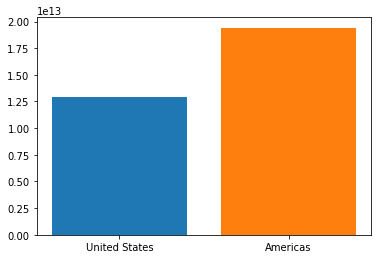

Sua expectativa de vida era igual a 78.24 anos, acima da média continental (73.61 anos) e acima da global (67.01 anos)


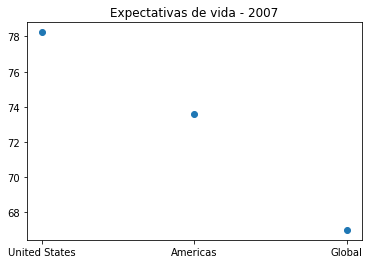

Com a população d@ United States representanto 33.5% da população do continente Americas e 4.82% da população global


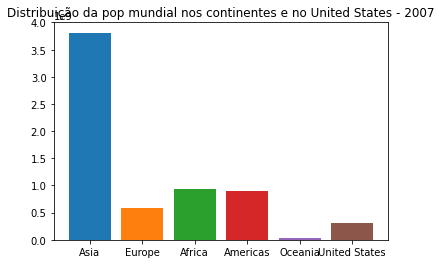

E a distribuição do pib no ano de 2007 foi:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


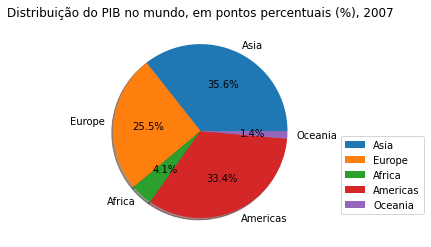

Com a seguinte progressão de expectativa de vida - 1952 a 2007


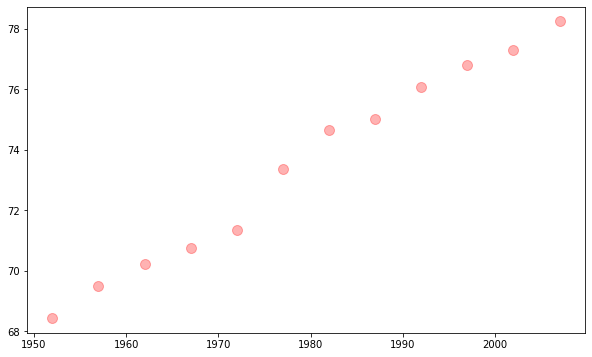

In [ ]:
def analise():
  # f"O PIB da(o) {continente_do_pais(País)} é ", significância, " percentualmente no mundo"
  porcentagemPIB = round((pib_do_pais()/pib_do_continente())*100,2)
  print("No ano de", Ano,"o PIB d@", País,f"era {porcentagemPIB_país_continente()}% do PIB do continente", continente_do_pais(País),f"e {porcentagemPIB_país_mundo()}% do PIB mundial")
  pib_bar_pais_continente()
  print(f"Sua expectativa de vida era igual a {ev_do_pais()} anos,", ev_comparação_pais_continente(),f"da média continental ({ev_do_continente()} anos) e",ev_comparação_pais_mundo(),f"da global ({ev_do_mundo()} anos)")
  plota_ev_scatter()
  print(f"Com a população d@ {País} representanto {porcentagemPOP_país_continente()}% da população do continente {continente_do_pais(País)} e {porcentagemPOP_país_mundo()}% da população global")
  plota_pop_bar(Ano)
  print(f"E a distribuição do pib no ano de {Ano} foi:")
  plota_pibs_pizza(Ano)
  print("Com a seguinte progressão de expectativa de vida - 1952 a 2007")
  plota_ev_ano_scatter()
analise()

# Análise dinâmica 🟢 📉
A Ideia dos Relatórios responsivos é trazer dados e análises simples do país escolhido pelo usuário. Pra isso, utilizei o framework do google forms pra gerar o dropdown com input.

No ano de 2007 o PIB d@ Cuba era 0.53% do PIB do continente Americas e 0.18% do PIB mundial


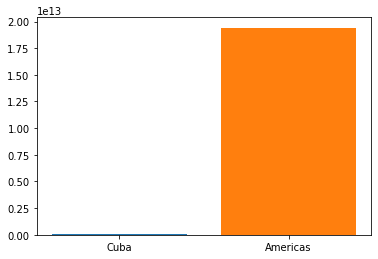

Sua expectativa de vida era igual a 78.27 anos, acima da média continental (73.61 anos) e acima da global (67.01 anos)


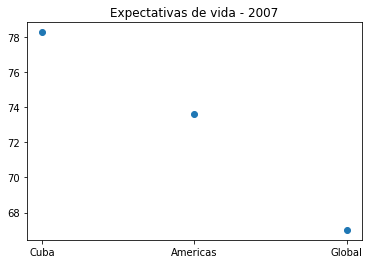

Com a população d@ Cuba representanto 1.27% da população do continente Americas e 0.18% da população global


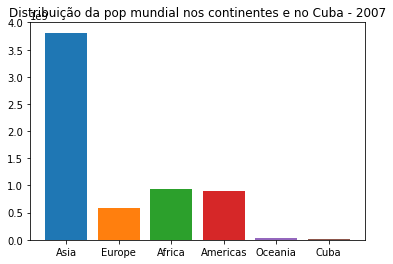

E a distribuição do pib no ano de 2007 foi:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


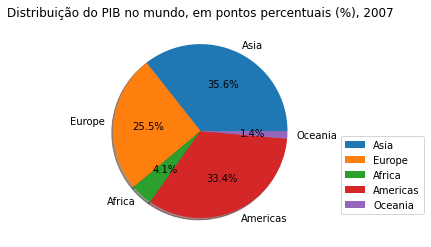

Com a seguinte progressão de expectativa de vida - 1952 a 2007


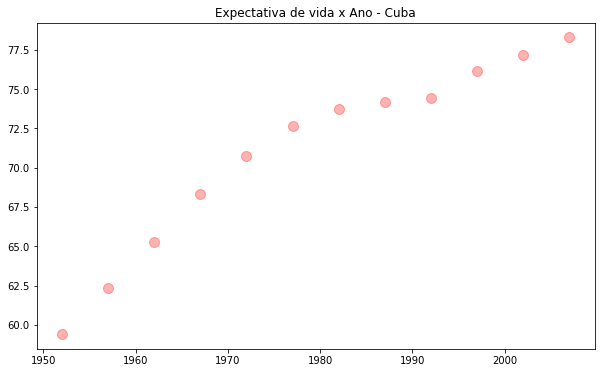

In [ ]:
#@title  { run: "auto" }

# Continente = "Asia" #@param['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
País = "Cuba" #@param['Afghanistan','Albania','Algeria','Angola','Argentina','Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium','Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil','Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon','Canada', 'Central African Republic', 'Chad', 'Chile', 'China','Colombia', 'Comoros', 'Congo, Dem. Rep.','Congo, Rep.','Costa Rica','Croatia', 'Cuba','Czech Republic','Denmark','Djibouti','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Ethiopia','Finland','France','Gabon','Gambia','Germany','Ghana','Greece','Guatemala','Guinea','Guinea-Bissau','Haiti','Honduras','Hong Kong, China','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Israel','Italy','Jamaica','Japan','Jordan','Kenya','Korea, Dem. Rep.','Korea, Rep.','Kuwait','Lebanon','Lesotho','Liberia','Libya','Madagascar','Malawi','Malaysia','Mali','Mauritania','Mauritius','Mexico','Mongolia','Montenegro', 'Morocco','Mozambique','Myanmar','Namibia','Nepal', 'Netherlands','New Zealand', 'Nicaragua', 'Niger','Nigeria', 'Norway', 'Oman','Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland','Portugal','Puerto Rico', 'Reunion', 'Romania', 'Rwanda','Sao Tome and Principe','Saudi Arabia','Senegal','Serbia','Sierra Leone', 'Singapore', 'Slovak Republic', 'Slovenia','Somalia','South Africa','Spain','Sri Lanka','Sudan','Swaziland', 'Sweden', 'Switzerland', 'Syria','Taiwan','Tanzania','Thailand','Togo','Trinidad and Tobago','Tunisia','Turkey', 'Uganda','United Kingdom', 'United States', 'Uruguay','Venezuela', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.','Zambia', 'Zimbabwe']
Ano = "2007" #@param[1952 ,1957 ,1962 ,1967 ,1972 ,1977 ,1982 ,1987 ,1992 ,1997, 2002, 2007]
analise()

# Análise estática 🔴 📉
###Correlação PIB percapta e Expectativa de Vida
- A partir de um loob para analisar cada país individualmente, conseguimos extrair as correlações e armazena-las em uma lista.



```
correlações = []
for p in paises:
  meudf = df_do_pais(p)
  correlação = abs(meudf['Expectativa de Vida'].corr(meudf['PIB per capita']))
  correlações.append(correlação)
```

- A partir dessa lista de correlações plotei boxplot.
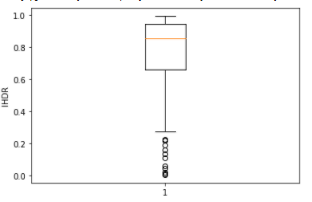
- A partir do boxplot, podemos observar que a correlação entre expectativa de vida e pib per capita é bem forte. Uma vez que o segundo quartil se encontra acima do 0.8. 

Por quê?
- Uma possível interpretação pra esse forte vínculo é relacionar o PIB per capita com distribuição de renda, e quanto maior o poder de compra do cidadão melhores condições alimentares, de moradia, sanitárias e etc. Diminuindo assim a taxa de mortalidade, que é uma variável importante no calculo da expectativa de vida. 

- Outra forma interessante de se analisar, que não vincularia necessariamente o fator distribuição de renda, mas uma democratização dos recursos básicos como hospitais públicos, postos de alimentação, enfim, a expanção do auxílio do estado na qualidade de vida do cidadão sem necessariamente distribuir de maneira direta a renda e sim o recurso a partir daquela "renda per capita". 


E os outliers?
- PIB per capita não significa necessariamente distribuição de renda, portanto, países ricos mas desiguais podem apresentar esse IHDR baixo. Assim, poderiamos até utilizar dessa baixa correlação para analisar a distribuição de renda do país (De maneira não muito profunda, claro.) e a escassez na distribuição desses recursos. Com essas interpretações em mente, criaremos um indicador que vamos chamar de "*Indicador histórico de distribuição de recursos*" **(IHDR)**,que se obtem SOMOMENTE se analisarmos o passar dos anos. 


 E a partir disso, IHDR's menores ou iguais a 0.70 indicariam uma RELEVANTE concentração de recursos/renda. 

- Pra isso, contei quantos países em cada continente tem IHDR menor ou igual a 0.7 para identificar o continente mais desigual. Assim, encontrei a seguinte distribuição.

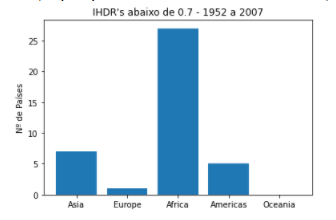

Ou seja, de acordo com esse nosso novo coeficiente, poderiamos considerar o Africa o continente com o menor distribuição de recursos. 

Vale ressaltar que a nossa base de dados não conta com muitos países. Na oceania por exemplo só temos Nova Zelândia e Australia. Portanto, seria interessante fazer a mesma análise com uma base de dados mais detalhada. 

Suas limitações e outras interpretações.
O país poderia fornecer uma infraestrutura pública que não necessariamente significaria distribuição de renda literal, mas sim a construção de hospitais, distribuição de alimentação e etc. que tbm afetariam o crescimento da expectativa de vida. 

Asia: 7 Europe: 1 Americas: 5 Africa: 27 Oceania: 0


array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

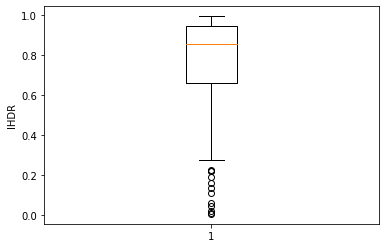

In [ ]:
#Correlação PIB percapta e Expectativa de Vida
# df['País'].unique() 
paises = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Reunion', 'Romania', 'Rwanda',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Sierra Leone', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan',
       'Swaziland', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Uganda', 'United Kingdom', 'United States', 'Uruguay',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.',
       'Zambia', 'Zimbabwe'] 
correlações = []
contAsia = 0 
contEu = 0 
contAmericas = 0 
contAfrica = 0 
contOceania = 0

for p in paises:
  meudf = df_do_pais(p)
  correlação = abs(meudf['Expectativa de Vida'].corr(meudf['PIB per capita']))
  correlações.append(correlação)
  if correlação <= 0.70:
    if continente_do_pais(p) == "Africa":
      contAfrica = contAfrica + 1
    if continente_do_pais(p) == "Asia":
      contAsia = contAsia + 1
    if continente_do_pais(p) == "Europe":
      contEu = contEu + 1
    if continente_do_pais(p) == "Oceania":
      contOceania = contOceania + 1
    if continente_do_pais(p) == "Americas":
      contAmericas = contAmericas + 1
np.percentile(correlações, q=50)
plt.boxplot(correlações)
plt.ylabel("IHDR")
print("Asia:",contAsia , "Europe:",contEu, "Americas:",contAmericas,"Africa:", contAfrica,"Oceania:", contOceania)
df['Continente'].unique()


Text(0.5, 1.0, "IHDR's abaixo de 0.7 - 1952 a 2007")

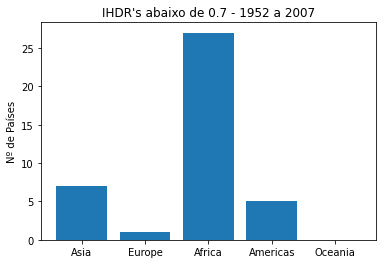

In [ ]:
plt.bar(CONTINENTES, [contAsia,contEu,contAfrica,contAmericas,contOceania])
plt. ylabel("Nº de Países") 
plt.title("IHDR's abaixo de 0.7 - 1952 a 2007")